In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#LOAD DATA
customer_interactions=pd.read_csv('customer_interactions.csv')
customer_interactions

,Customer ID,Interaction Date,Interaction Type,Interaction Channel
0,1,2/28/2024,share,website
1,2,4/27/2024,view,social media
2,3,2/26/2024,share,email
3,4,2/13/2024,click,email
4,5,4/1/2024,share,social media
...,...,...,...,...
995,996,5/17/2024,share,website
996,997,6/14/2024,share,email
997,998,3/27/2024,view,social media
998,999,1/29/2024,view,email


In [5]:
customer_demmographic=pd.read_csv('customer_demographic_data.csv')
customer_demmographic

,Customer ID,Age,Gender,Location,Income Level
0,1,65,Male,Martinezmouth,61083
1,2,43,Non-binary,South Anne,90419
2,3,58,Non-binary,West Darrellport,38260
3,4,53,Non-binary,Stevenshire,34649
4,5,69,Female,South Kellychester,70420
...,...,...,...,...,...
1495,1496,20,Female,Grayville,34803
1496,1497,63,Female,Ericksonberg,20942
1497,1498,58,Male,Cannonborough,32766
1498,1499,39,Non-binary,South Courtneyland,34664


In [6]:
sales=pd.read_csv('sales_data.csv')
sales

,Transaction ID,Transaction Date,Customer ID,Product ID,Product Category,Sales Amount,Quantity
0,1,1/19/2024,213,345,Books,295.15,7
1,2,6/11/2024,59,134,Electronics,457.78,1
2,3,1/10/2024,178,89,Electronics,423.84,2
3,4,5/30/2024,359,423,Home & Kitchen,497.52,1
4,5,3/21/2024,384,139,Clothing,164.21,7
...,...,...,...,...,...,...,...
1365,1366,4/23/2024,539,38,Clothing,480.46,6
1366,1367,1/26/2024,404,144,Home & Kitchen,143.34,2
1367,1368,6/2/2024,282,453,Electronics,120.32,4
1368,1369,6/22/2024,190,465,Home & Kitchen,109.48,10


In [7]:
#DATA CLEANING


In [8]:
customer_interactions.isnull().sum()
#null values

Customer ID             0
Interaction Date        0
Interaction Type        0
Interaction Channel    11
dtype: int64

In [9]:
customer_interactions.dtypes
#change date datatype

Customer ID             int64
Interaction Date       object
Interaction Type       object
Interaction Channel    object
dtype: object

In [10]:
customer_demmographic.isnull().sum()

Customer ID     0
Age             0
Gender          0
Location        0
Income Level    0
dtype: int64

In [11]:
customer_demmographic.dtypes

Customer ID      int64
Age              int64
Gender          object
Location        object
Income Level     int64
dtype: object

In [12]:
sales.isnull().sum()

Transaction ID      0
Transaction Date    0
Customer ID         0
Product ID          0
Product Category    0
Sales Amount        0
Quantity            0
dtype: int64

In [13]:
sales.dtypes
#change datatype

Transaction ID        int64
Transaction Date     object
Customer ID           int64
Product ID            int64
Product Category     object
Sales Amount        float64
Quantity              int64
dtype: object

In [14]:
customer_interactions['Interaction Date']=customer_interactions['Interaction Date'].astype('datetime64[ns]')

In [15]:
from sklearn.impute import SimpleImputer

imputer=SimpleImputer(strategy='most_frequent')
imputer.fit(customer_interactions[['Interaction Channel']])

customer_interactions[['Interaction Channel']]=imputer.transform(customer_interactions[['Interaction Channel']])



In [16]:
sales['Transaction Date']=sales['Transaction Date'].astype('datetime64[ns]')

In [17]:
#Q1 How many customers interacted with our campaign materials, and what was the engagement rate?

In [18]:
customer_interactions['Customer ID'].nunique()

1000

In [19]:
total_cust_by_type=customer_interactions['Interaction Type'].value_counts()
total_cust_by_type

Interaction Type
share    356
click    326
view     318
Name: count, dtype: int64

In [20]:
total_cust_by_type_perc=(customer_interactions['Interaction Type'].value_counts()/1000)*100
total_cust_by_type_perc

Interaction Type
share    35.6
click    32.6
view     31.8
Name: count, dtype: float64

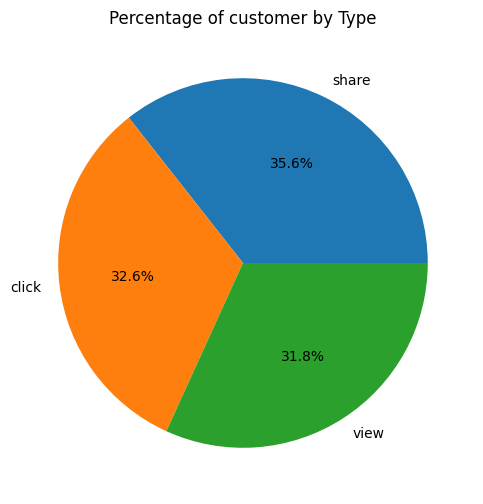

In [21]:
plt.figure(figsize=(10,6))
total_cust_by_type_perc.plot(kind='pie',autopct='%1.1f%%')
plt.title('Percentage of customer by Type')
plt.ylabel('')
plt.xlabel('')
plt.show()

In [22]:
total_cust_by_chan_perc=customer_interactions['Interaction Channel'].value_counts()
total_cust_by_chan_perc

Interaction Channel
website         345
email           329
social media    326
Name: count, dtype: int64

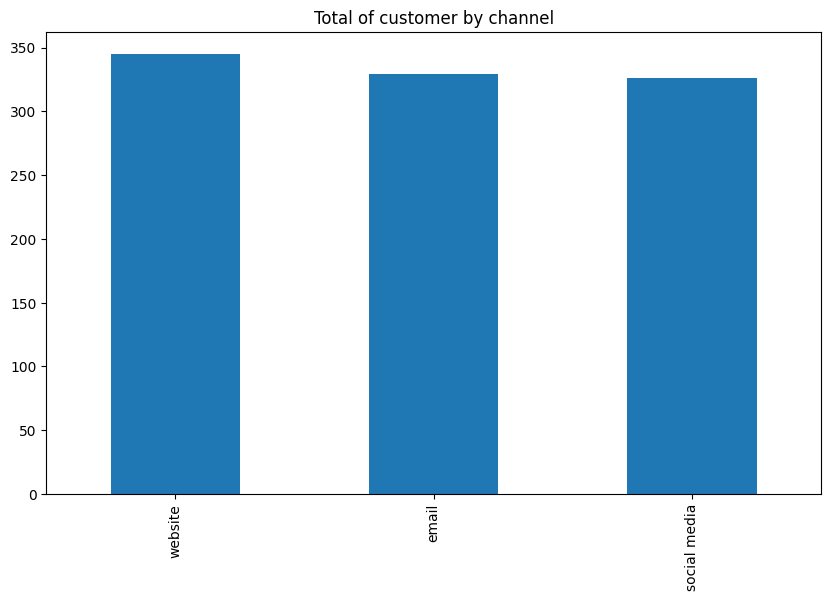

In [23]:
plt.figure(figsize=(10,6))
total_cust_by_chan_perc.plot(kind='bar')
plt.title('Total of customer by channel')
plt.ylabel('')
plt.xlabel('')
plt.show()

In [24]:
engagement_rate=(1000/1500)*100
non_engagement=100-engagement_rate
engagement_cust={'engagement_rate':engagement_rate,'non_engagement':non_engagement}
engagement_cust

{'engagement_rate': 66.66666666666666, 'non_engagement': 33.33333333333334}

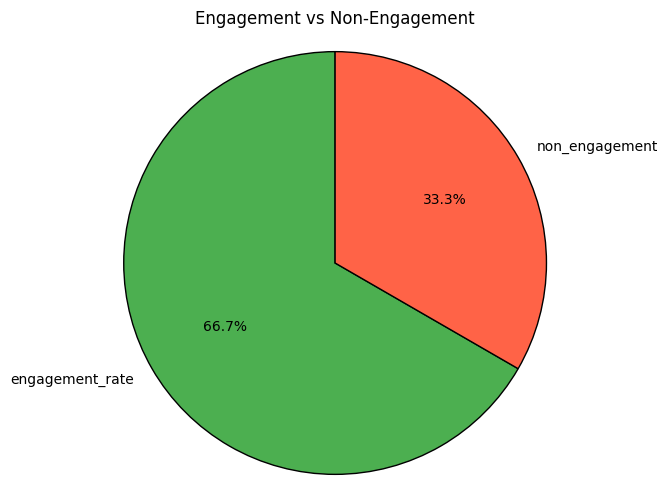

In [25]:
labels = engagement_cust.keys()
sizes = engagement_cust.values()

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['#4CAF50', '#FF6347'], wedgeprops={'edgecolor': 'black'})
plt.title('Engagement vs Non-Engagement')
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is drawn as a circle.

# Show the pie chart
plt.show()

In [26]:
#What percentage of engaged customers made a purchase, and how does this compare to our targets?

In [27]:
cust_inter_purchase=customer_interactions.merge(sales,on="Customer ID",how="inner")
cust_inter_purchase

,Customer ID,Interaction Date,Interaction Type,Interaction Channel,Transaction ID,Transaction Date,Product ID,Product Category,Sales Amount,Quantity
0,1,2024-02-28,share,website,178,2024-05-31,88,Home & Kitchen,372.84,6
1,2,2024-04-27,view,social media,135,2024-03-18,84,Clothing,485.74,9
2,2,2024-04-27,view,social media,223,2024-07-04,99,Sports,482.55,6
3,2,2024-04-27,view,social media,886,2024-03-13,170,Home & Kitchen,272.24,9
4,2,2024-04-27,view,social media,1183,2024-02-06,241,Books,13.68,7
...,...,...,...,...,...,...,...,...,...,...
1365,791,2024-03-06,share,social media,68,2024-05-09,116,Clothing,489.72,10
1366,791,2024-03-06,share,social media,370,2024-05-17,170,Home & Kitchen,370.79,2
1367,791,2024-03-06,share,social media,1194,2024-06-20,3,Sports,223.29,9
1368,792,2024-03-07,click,social media,664,2024-01-18,292,Sports,455.79,9


In [28]:
cust_inter_purchase_count=cust_inter_purchase['Customer ID'].nunique()
cust_inter_purchase_count

656

In [29]:
purch_rate_targeted=(cust_inter_purchase_count/1500)*100
purch_rate_engaged=(cust_inter_purchase_count/1000)*100

print("Purchare rate by Targeted Customers",round(purch_rate_targeted,2))
print("Purchare rate by Engaged Customers",round(purch_rate_engaged,2))

Purchare rate by Targeted Customers 43.73
Purchare rate by Engaged Customers 65.6


In [30]:
#What was the overall impact on sales? Did we see a significant increase in sales during and after the campaign period?

In [31]:
sales.head()

,Transaction ID,Transaction Date,Customer ID,Product ID,Product Category,Sales Amount,Quantity
0,1,2024-01-19,213,345,Books,295.15,7
1,2,2024-06-11,59,134,Electronics,457.78,1
2,3,2024-01-10,178,89,Electronics,423.84,2
3,4,2024-05-30,359,423,Home & Kitchen,497.52,1
4,5,2024-03-21,384,139,Clothing,164.21,7


In [32]:
#New Feature

sales['Sales']=sales['Sales Amount']*sales['Quantity']
sales.head()

,Transaction ID,Transaction Date,Customer ID,Product ID,Product Category,Sales Amount,Quantity,Sales
0,1,2024-01-19,213,345,Books,295.15,7,2066.05
1,2,2024-06-11,59,134,Electronics,457.78,1,457.78
2,3,2024-01-10,178,89,Electronics,423.84,2,847.68
3,4,2024-05-30,359,423,Home & Kitchen,497.52,1,497.52
4,5,2024-03-21,384,139,Clothing,164.21,7,1149.47


In [33]:
sales['Month']=sales["Transaction Date"].dt.month
sales['Day']=sales["Transaction Date"].dt.day
sales.head()

,Transaction ID,Transaction Date,Customer ID,Product ID,Product Category,Sales Amount,Quantity,Sales,Month,Day
0,1,2024-01-19,213,345,Books,295.15,7,2066.05,1,19
1,2,2024-06-11,59,134,Electronics,457.78,1,457.78,6,11
2,3,2024-01-10,178,89,Electronics,423.84,2,847.68,1,10
3,4,2024-05-30,359,423,Home & Kitchen,497.52,1,497.52,5,30
4,5,2024-03-21,384,139,Clothing,164.21,7,1149.47,3,21


In [34]:
sales_campaign=sales[sales["Month"]<5]["Sales"]
sales_after_campaign=sales[sales["Month"]>4]["Sales"]

In [35]:
sales_campaign_total=sum(sales_campaign)
print("Sales during campaign is",round(sales_campaign_total,2))

Sales during campaign is 1308551.48


In [36]:
sales_after_campaign_total=sum(sales_after_campaign)
print("Sales after campaign is",round(sales_after_campaign_total,2))

Sales after campaign is 637323.82


In [37]:
sales_increase=((sales_campaign_total-sales_after_campaign_total)/sales_after_campaign_total)*100
print("Rate of increase during campaign is",round(sales_increase,2),"%")

Rate of increase during campaign is 105.32 %


In [38]:
#q: How does the ROI of this campaign compare to previous ones? Was our spending justified by the results?

In [39]:
roi_recent=((sales_campaign_total-50000)/50000)*100
print("roi of recent campaign : ",round(roi_recent,2))

roi of recent campaign :  2517.1


In [40]:
roi_prev_recent=((268009-57000)/57000)*100
print("roi of recent campaign : ",round(roi_prev_recent,2))

roi of recent campaign :  370.19


In [41]:
roi_growth=((roi_recent-roi_prev_recent)/roi_prev_recent)*100
print("Percentage growth in ROI IS",round(roi_growth,2),"%")

Percentage growth in ROI IS 579.95 %


In [42]:
#q: Which customer demographics responded most
#positively or negatively to the campaign? Are there specific segments we should focus on or avoid in the future?

In [43]:
interacted_cust_data= customer_demmographic.merge(customer_interactions,on='Customer ID',how='inner')
interacted_cust_data

,Customer ID,Age,Gender,Location,Income Level,Interaction Date,Interaction Type,Interaction Channel
0,1,65,Male,Martinezmouth,61083,2024-02-28,share,website
1,2,43,Non-binary,South Anne,90419,2024-04-27,view,social media
2,3,58,Non-binary,West Darrellport,38260,2024-02-26,share,email
3,4,53,Non-binary,Stevenshire,34649,2024-02-13,click,email
4,5,69,Female,South Kellychester,70420,2024-04-01,share,social media
...,...,...,...,...,...,...,...,...
995,996,42,Other,Crossside,81911,2024-05-17,share,website
996,997,28,Other,Paulamouth,73131,2024-06-14,share,email
997,998,49,Female,Glennborough,95539,2024-03-27,view,social media
998,999,58,Female,Port Marc,47256,2024-01-29,view,email


In [44]:
young_low_income_intr = interacted_cust_data[(interacted_cust_data["Age"] > 17) & (interacted_cust_data["Age"] < 25) & (interacted_cust_data["Income Level"] < 30000)]
young_low_income_intr.head()

,Customer ID,Age,Gender,Location,Income Level,Interaction Date,Interaction Type,Interaction Channel
51,52,20,Other,Dianaton,19176,2024-05-04,view,social media
64,65,21,Male,Lukemouth,26780,2024-01-18,click,social media
92,93,20,Other,Port Marvin,23532,2024-03-11,view,social media
114,115,20,Female,Lake Robertfurt,14709,2024-02-06,share,website
138,139,23,Non-binary,Cherylburgh,19490,2024-04-05,view,email


In [45]:
young_medium_income_intr = interacted_cust_data[(interacted_cust_data["Age"] > 17) & (interacted_cust_data["Age"] < 25) & (interacted_cust_data["Income Level"] > 30000) & (interacted_cust_data["Income Level"] < 75000)]
young_medium_income_intr.head()

,Customer ID,Age,Gender,Location,Income Level,Interaction Date,Interaction Type,Interaction Channel
8,9,24,Non-binary,East Melanie,43329,2024-04-08,click,email
12,13,23,Non-binary,Port Vincent,46646,2024-02-01,share,social media
20,21,19,Non-binary,Paceview,53522,2024-04-27,share,website
72,73,22,Non-binary,Sherriton,55401,2024-02-05,click,social media
82,83,19,Female,Gibbsstad,44655,2024-03-02,click,email


In [46]:
middle_high_income_intr = interacted_cust_data[(interacted_cust_data["Age"] > 24) & (interacted_cust_data["Income Level"] > 75000)]
middle_high_income_intr.head()

,Customer ID,Age,Gender,Location,Income Level,Interaction Date,Interaction Type,Interaction Channel
1,2,43,Non-binary,South Anne,90419,2024-04-27,view,social media
6,7,43,Male,Lake Joseph,89845,2024-03-03,click,website
9,10,37,Non-binary,Port Andrew,81745,2024-05-01,share,email
16,17,66,Other,East Jessica,95692,2024-04-16,click,email
19,20,41,Male,North David,77251,2024-03-11,click,website


In [47]:
young_low_income_intr_cust = young_low_income_intr["Customer ID"].nunique()
egr_young_low_income_intr_cust = (young_low_income_intr_cust / 1000) * 100
round(egr_young_low_income_intr_cust, 2)

2.9

In [48]:
young_medium_income_intr_cust = young_medium_income_intr["Customer ID"].nunique()
egr_young_medium_income_intr_cust = (young_medium_income_intr_cust / 1000) * 100
round(egr_young_medium_income_intr_cust, 2)

7.7

In [49]:
middle_high_income_intr_cust = middle_high_income_intr["Customer ID"].nunique()
egr_middle_high_income_intr_cust = (middle_high_income_intr_cust / 1000) * 100
round(egr_middle_high_income_intr_cust, 2)

22.8

In [50]:
converted_cust_data = customer_demmographic.merge(cust_inter_purchase, on = "Customer ID", how = "inner")
converted_cust_data.head()

,Customer ID,Age,Gender,Location,Income Level,Interaction Date,Interaction Type,Interaction Channel,Transaction ID,Transaction Date,Product ID,Product Category,Sales Amount,Quantity
0,1,65,Male,Martinezmouth,61083,2024-02-28,share,website,178,2024-05-31,88,Home & Kitchen,372.84,6
1,2,43,Non-binary,South Anne,90419,2024-04-27,view,social media,135,2024-03-18,84,Clothing,485.74,9
2,2,43,Non-binary,South Anne,90419,2024-04-27,view,social media,223,2024-07-04,99,Sports,482.55,6
3,2,43,Non-binary,South Anne,90419,2024-04-27,view,social media,886,2024-03-13,170,Home & Kitchen,272.24,9
4,2,43,Non-binary,South Anne,90419,2024-04-27,view,social media,1183,2024-02-06,241,Books,13.68,7


In [51]:
young_low_income_cnvr = converted_cust_data[(converted_cust_data["Age"] > 17) & (converted_cust_data["Age"] < 25) & (converted_cust_data["Income Level"] < 30000)]
young_low_income_cnvr.head()

,Customer ID,Age,Gender,Location,Income Level,Interaction Date,Interaction Type,Interaction Channel,Transaction ID,Transaction Date,Product ID,Product Category,Sales Amount,Quantity
85,52,20,Other,Dianaton,19176,2024-05-04,view,social media,849,2024-05-19,88,Books,488.03,4
86,52,20,Other,Dianaton,19176,2024-05-04,view,social media,1105,2024-04-27,195,Home & Kitchen,264.88,3
101,65,21,Male,Lukemouth,26780,2024-01-18,click,social media,584,2024-02-25,31,Clothing,313.44,6
168,115,20,Female,Lake Robertfurt,14709,2024-02-06,share,website,1356,2024-02-27,128,Toys,43.71,6
209,139,23,Non-binary,Cherylburgh,19490,2024-04-05,view,email,616,2024-02-23,177,Toys,284.77,10


In [52]:
young_medium_income_cnvr = converted_cust_data[(converted_cust_data["Age"] > 17) & (converted_cust_data["Age"] < 25) & (converted_cust_data["Income Level"] > 30000) & (converted_cust_data["Income Level"] < 75000)]
young_medium_income_cnvr.head()

,Customer ID,Age,Gender,Location,Income Level,Interaction Date,Interaction Type,Interaction Channel,Transaction ID,Transaction Date,Product ID,Product Category,Sales Amount,Quantity
11,9,24,Non-binary,East Melanie,43329,2024-04-08,click,email,64,2024-02-02,372,Books,492.84,5
12,9,24,Non-binary,East Melanie,43329,2024-04-08,click,email,119,2024-02-26,162,Home & Kitchen,425.09,3
13,9,24,Non-binary,East Melanie,43329,2024-04-08,click,email,1205,2024-03-14,232,Toys,188.41,3
30,21,19,Non-binary,Paceview,53522,2024-04-27,share,website,491,2024-03-25,207,Electronics,489.17,2
31,21,19,Non-binary,Paceview,53522,2024-04-27,share,website,581,2024-06-25,231,Home & Kitchen,110.57,7


In [53]:
middle_high_income_cnvr = converted_cust_data[(converted_cust_data["Age"] > 24) & (converted_cust_data["Income Level"] > 75000)]
middle_high_income_cnvr.head()

,Customer ID,Age,Gender,Location,Income Level,Interaction Date,Interaction Type,Interaction Channel,Transaction ID,Transaction Date,Product ID,Product Category,Sales Amount,Quantity
1,2,43,Non-binary,South Anne,90419,2024-04-27,view,social media,135,2024-03-18,84,Clothing,485.74,9
2,2,43,Non-binary,South Anne,90419,2024-04-27,view,social media,223,2024-07-04,99,Sports,482.55,6
3,2,43,Non-binary,South Anne,90419,2024-04-27,view,social media,886,2024-03-13,170,Home & Kitchen,272.24,9
4,2,43,Non-binary,South Anne,90419,2024-04-27,view,social media,1183,2024-02-06,241,Books,13.68,7
14,10,37,Non-binary,Port Andrew,81745,2024-05-01,share,email,342,2024-01-06,116,Books,11.30,1


In [54]:
young_low_income_cnvr_cust = young_low_income_cnvr["Customer ID"].nunique()
cnvr_young_low_income_cust = (young_low_income_cnvr_cust / cust_inter_purchase_count) * 100
round(cnvr_young_low_income_cust, 2)

2.74

In [55]:
young_medium_income_cnvr_cust = young_medium_income_cnvr["Customer ID"].nunique()
cnvr_young_medium_income_cust = (young_medium_income_cnvr_cust / cust_inter_purchase_count) * 100
round(cnvr_young_medium_income_cust, 2)

8.38

In [56]:
middle_high_income_cnvr_cust = middle_high_income_cnvr["Customer ID"].nunique()
cnvr_middle_high_income_cust = (middle_high_income_cnvr_cust / cust_inter_purchase_count) * 100
round(cnvr_middle_high_income_cust, 2)

22.87

In [1]:
#Thank you